In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
simu_dir = Path('../input/grace-simulated-accelerometer-data')

In [4]:
x_axis= pd.read_csv(simu_dir/'ACC1B_2005-05-30_A_MDC-02.asc',header=None, sep=' ', skiprows=23,usecols=[2])

In [5]:
x_axis.shape

(17280, 1)

In [6]:
 df= x_axis[0:24*3600:30]

In [7]:
df.shape

(576, 1)

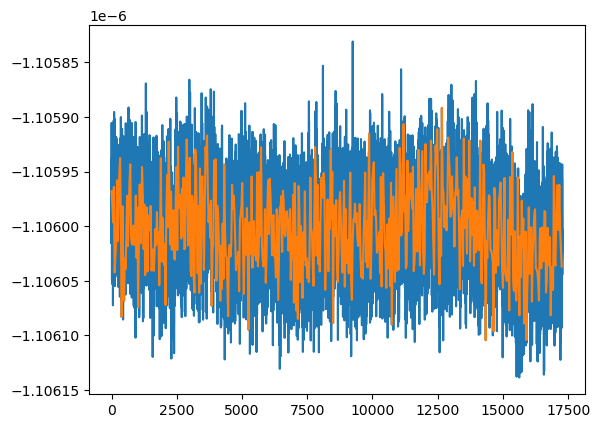

In [8]:
plt.plot(x_axis)
plt.plot(df)
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

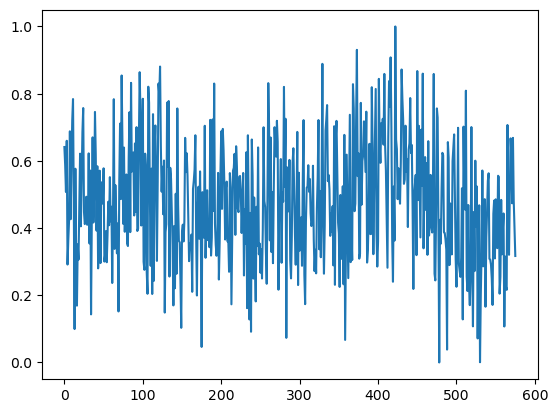

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
plt.plot(df)
plt.show()

In [11]:
train_size = int(len(df) * 0.7)
train, test = df[0:train_size], df[train_size:]

In [12]:
def create_dataset(dataset, look_back=1):
    X,Y = [], []
    for i in range(len(dataset)-look_back-1):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [13]:
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(32, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

In [14]:
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(10))
model.add(Dense(32))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 768       
                                                                 
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,243
Trainable params: 1,243
Non-trainable params: 0
_________________________________________________________________


model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(10))
model.add(Dense(32))
model.add(Dense(1))
model.summary()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout

model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(1, look_back))))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

In [15]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
#history = model.fit(trainX, trainY, epochs=100, batch_size=1)
history = model.fit(trainX, trainY, epochs=300, batch_size=8)
#history = model.fit(trainX,trainY, epochs=300, batch_size =32, validation_split= 0.15)
#history = model.fit(trainX,trainY, epochs=300, batch_size =16,validation_data= (testX, testY))

Epoch 1/300
49/49 [==============================] - 3s 3ms/step - loss: 0.0422
Epoch 2/300
49/49 [==============================] - 0s 3ms/step - loss: 0.0313
Epoch 3/300
49/49 [==============================] - 0s 4ms/step - loss: 0.0310
Epoch 4/300
49/49 [==============================] - 0s 3ms/step - loss: 0.0306
Epoch 5/300
49/49 [==============================] - 0s 3ms/step - loss: 0.0306
Epoch 6/300
49/49 [==============================] - 0s 3ms/step - loss: 0.0300
Epoch 7/300
49/49 [==============================] - 0s 3ms/step - loss: 0.0296
Epoch 8/300
49/49 [==============================] - 0s 3ms/step - loss: 0.0295
Epoch 9/300
49/49 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 10/300
49/49 [==============================] - 0s 3ms/step - loss: 0.0296
Epoch 11/300
49/49 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 12/300
49/49 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 13/300
49/49 [=================

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers

# Define the model architecture

model.compile(
    loss='mean_squared_error',
    optimizer=Adam(learning_rate=0.001),
    metrics=['mean_absolute_error']  # Add additional metrics if needed
)

# Implement learning rate scheduling
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor the validation loss
    factor=0.1,  # Reduce the learning rate by a factor of 0.1
    patience=10,  # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1  # Print a message when learning rate is reduced
)

# Train the model with callbacks
history = model.fit(
    trainX,
    trainY,
    epochs=300,
    batch_size=32,
    validation_data=(testX, testY),
    callbacks=[reduce_lr]
)


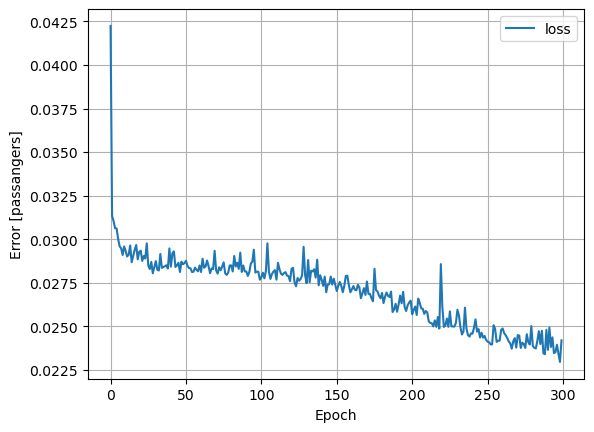

In [16]:
plt.plot(history.history['loss'], label='loss')
#plt.ylim([0, 0.01])
plt.xlabel('Epoch')
plt.ylabel('Error [passangers]')
plt.legend()
plt.grid(True)

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.9f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.9f RMSE' % (testScore))

5/5 [==============================] - 0s 2ms/step
Train Score: 0.000000000 RMSE
Test Score: 0.000000000 RMSE


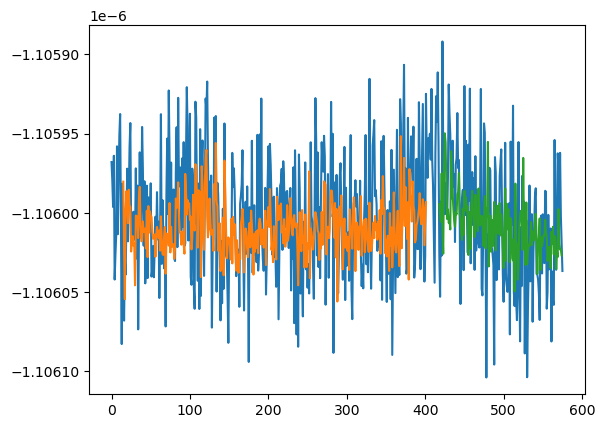

In [18]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()